
NOTE: THE CODE BELOW IS A DIREC REPRODUCTION OF THE WORK AT https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
        ALL THE CREDITS GO TO THE ORIGINAL AUTHOR:- AARSHAY JAIN

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
data=pd.read_csv('AirPassengers.csv')

In [113]:
print (data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [114]:
print (data.dtypes)

Month          object
#Passengers     int64
dtype: object


In [115]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (data.dtypes)

#Passengers    int64
dtype: object


In [116]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [117]:
ts=data['#Passengers']

In [118]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

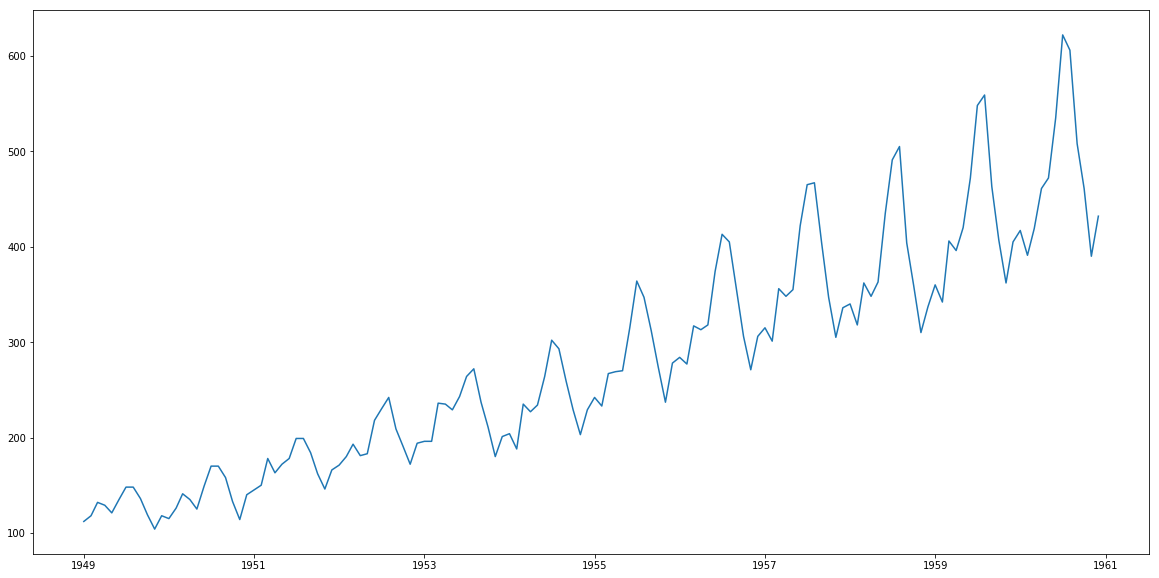

In [119]:
plt.figure(figsize=(20,10))
plt.plot(ts)

In [120]:
from statsmodels.tsa.stattools import adfuller

In [121]:
def test_stationarity(timeseries):
    rolmean=pd.rolling_mean(timeseries,window=12)
    rolstd=pd.rolling_std(timeseries,window=12)
    
    orig=plt.plot(timeseries, color='red',label='original')
    mean=plt.plot(rolmean,color='blue',label='rolling mean')
    std=plt.plot(rolstd,color='black',label='rolling standard deviation')
    plt.legend(loc='best')
    
    print ('Results from Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print (dfoutput)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


Results from Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


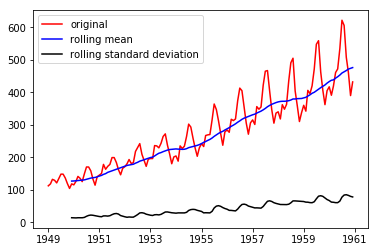

In [122]:
test_stationarity(ts)

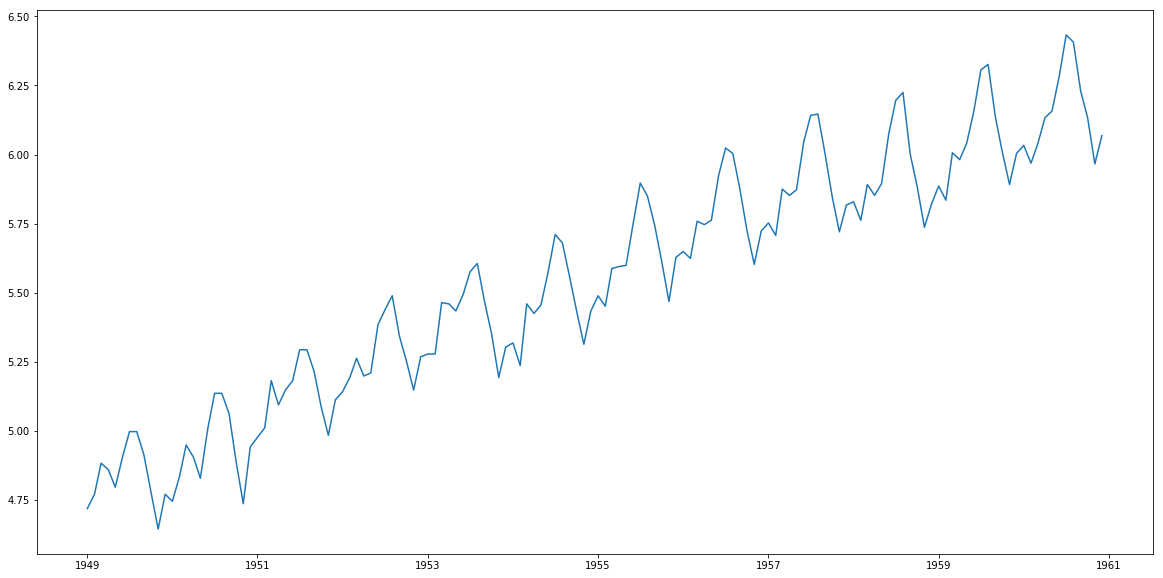

In [123]:
ts_log=np.log(ts)
plt.figure(figsize=(20,10))
plt.plot(ts_log)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


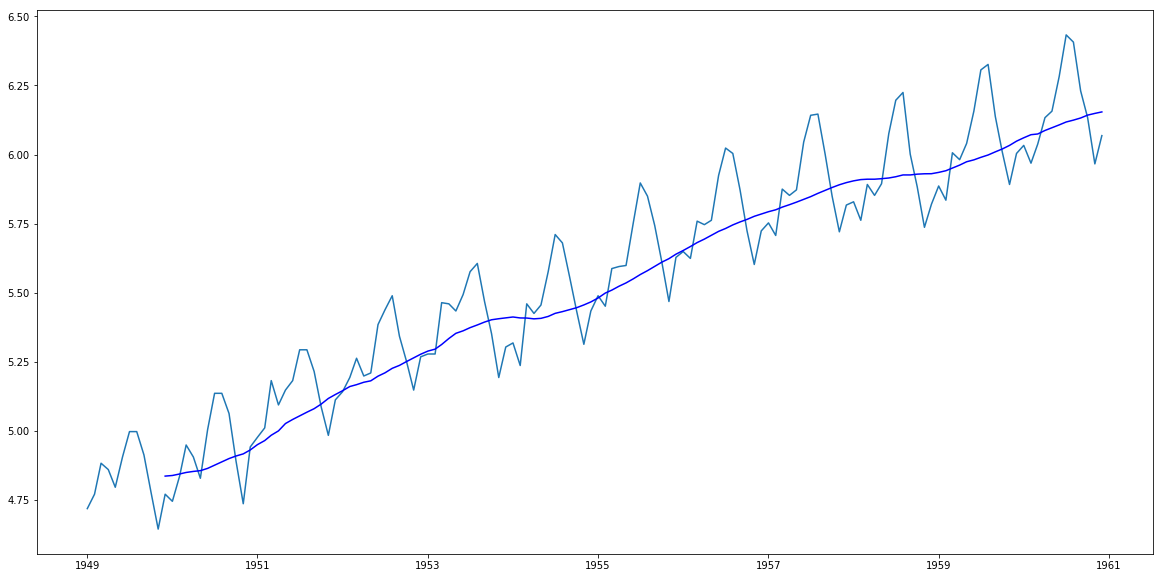

In [124]:
moving_avg=pd.rolling_mean(ts_log,12)
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg,color='blue')

In [125]:
ts_log_moving_avg_diff=ts_log-moving_avg

In [126]:
ts_log_moving_avg_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
1951-03-01    0.197694
1951-04-01    0.093955
1951-05-01    0.121101
1951-06-01    0.140570
                ...   
1958-07-01    0.276817
1958-08-01    0.298412
1958-09-01    0.075268
1958-10-01   -0.045657
1958-11-01   -0.193762
1958-12-01   -0.110499
1959-01-01   -0.049241
1959-02-01   -0.106598
1959-03-01    0.055385
1959-04-01    0.019679
1959-05-01    0.066365
1959-06-01    0.176286
1959-

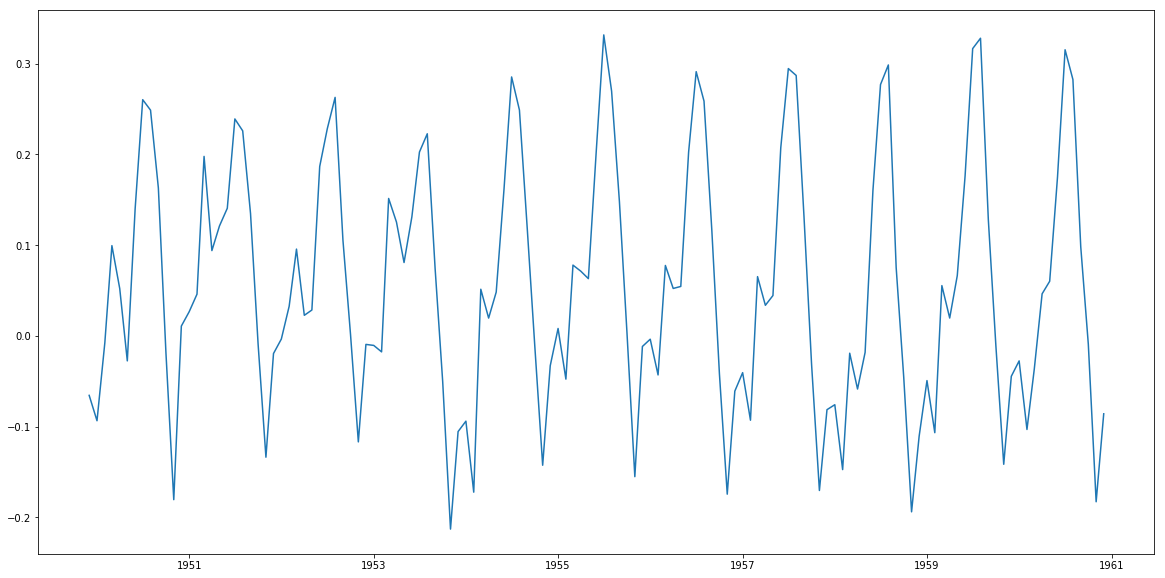

In [127]:
plt.figure(figsize=(20,10))
plt.plot(ts_log_moving_avg_diff)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


Results from Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


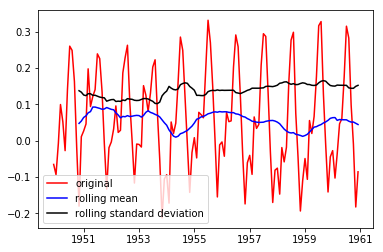

In [128]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [129]:
expweighted_avg=pd.ewma(ts_log,halflife=12)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


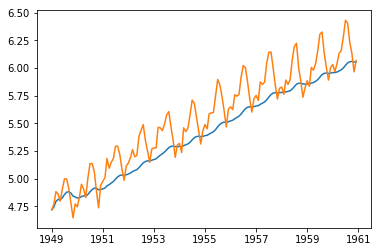

In [130]:
plt.plot(expweighted_avg)
plt.plot(ts_log)

In [131]:
ts_log_ewma_diff=ts_log-expweighted_avg

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


Results from Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


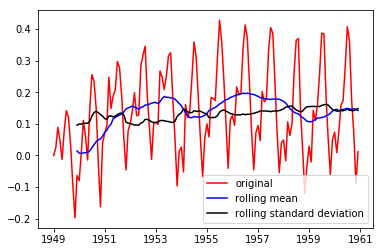

In [132]:
test_stationarity(ts_log_ewma_diff)

In [133]:
ts_log_diff=ts_log-ts_log.shift()

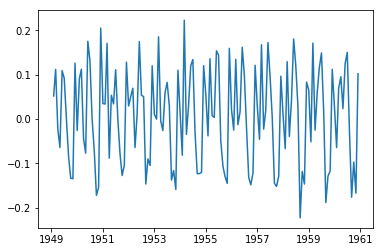

In [134]:
plt.plot(ts_log_diff)

In [135]:
ts_log_diff.dropna(inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


Results from Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


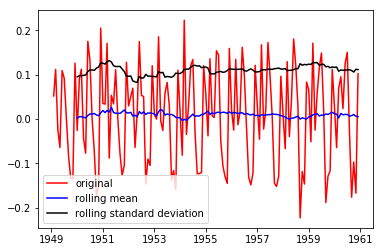

In [136]:
test_stationarity(ts_log_diff)

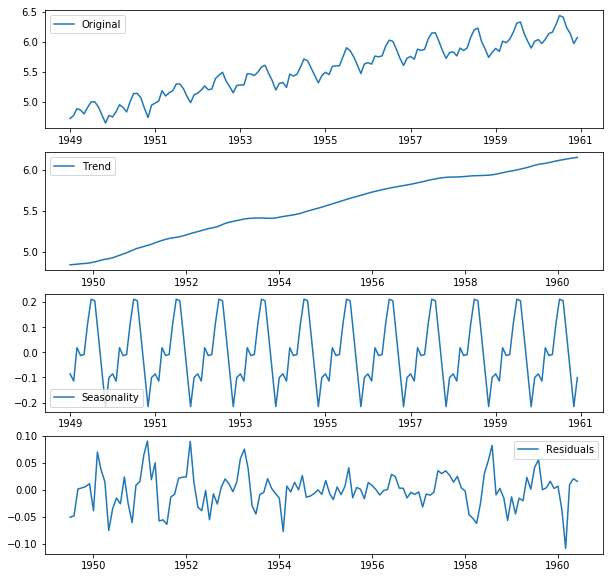

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')



C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


Results from Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


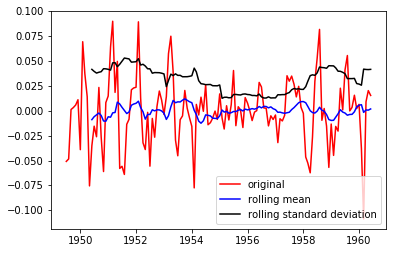

In [138]:
ts_log_decompose=residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [139]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(ts_log_diff,nlags=20)
lag_pacf=pacf(ts_log_diff,nlags=20,method='ols')


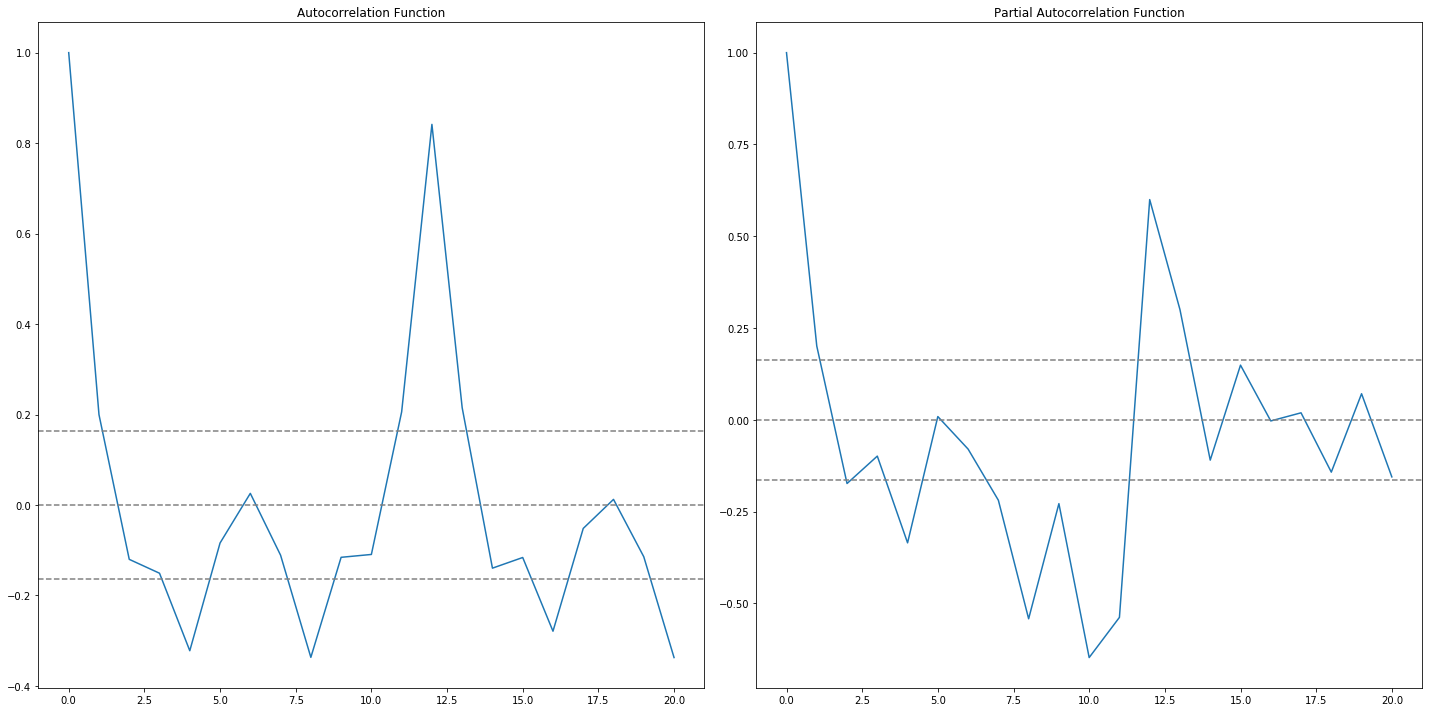

In [140]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [141]:
from statsmodels.tsa.arima_model import ARIMA

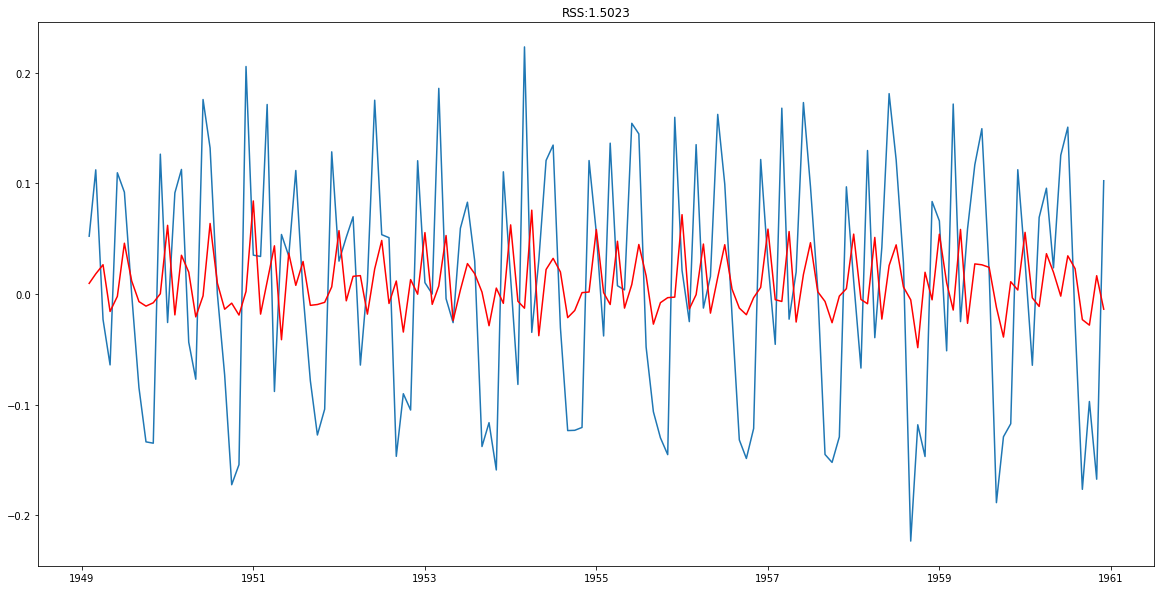

In [142]:
model=ARIMA(ts_log,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%0.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

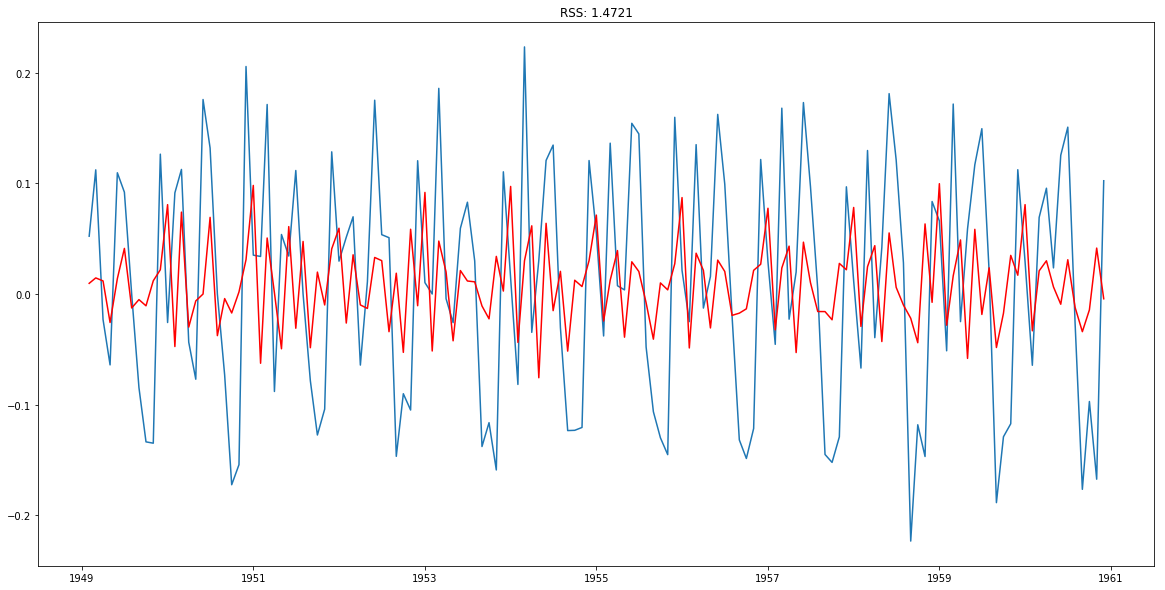

In [143]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

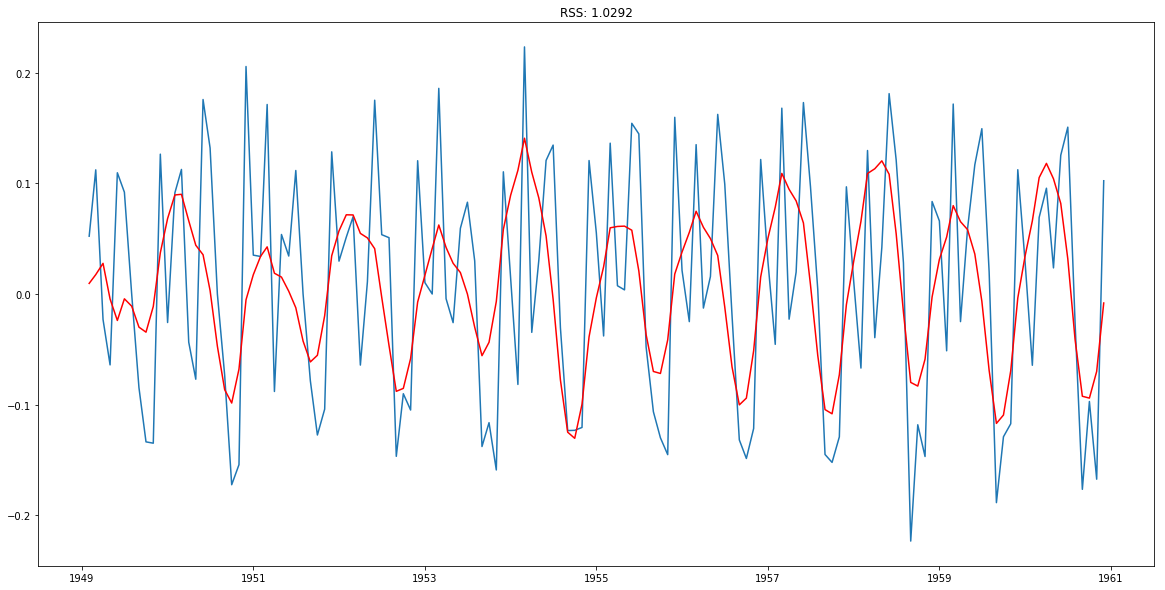

In [144]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(20,10))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [145]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [146]:
predictions_ARIMA_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005227
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058869
1958-12-01   -0.002663
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036074
1959-

In [147]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220142
1950-04-01    0.286294
1950-05-01    0.330347
1950-06-01    0.365814
1950-07-01    0.368915
1950-08-01    0.321787
1950-09-01    0.235434
1950-10-01    0.136969
1950-11-01    0.069123
1950-12-01    0.063896
1951-01-01    0.081280
1951-02-01    0.115296
1951-03-01    0.157857
1951-04-01    0.176605
1951-05-01    0.191865
1951-06-01    0.194354
1951-07-01    0.181946
                ...   
1958-07-01    1.166554
1958-08-01    1.150089
1958-09-01    1.070247
1958-10-01    0.987104
1958-11-01    0.928234
1958-12-01    0.925572
1959-01-01    0.956771
1959-02-01    1.008216
1959-03-01    1.088023
1959-04-01    1.153357
1959-05-01    1.211547
1959-06-01    1.247621
1959-

In [148]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665109
1949-11-01    4.653831
1949-12-01    4.691043
1950-01-01    4.759178
1950-02-01    4.848612
1950-03-01    4.938641
1950-04-01    5.004793
1950-05-01    5.048846
1950-06-01    5.084313
1950-07-01    5.087413
1950-08-01    5.040286
1950-09-01    4.953933
1950-10-01    4.855468
1950-11-01    4.787622
1950-12-01    4.782394
1951-01-01    4.799779
1951-02-01    4.833795
1951-03-01    4.876356
1951-04-01    4.895104
1951-05-01    4.910364
1951-06-01    4.912853
                ...   
1958-07-01    5.885053
1958-08-01    5.868588
1958-09-01    5.788746
1958-10-01    5.705603
1958-11-01    5.646733
1958-12-01    5.644071
1959-01-01    5.675270
1959-02-01    5.726715
1959-03-01    5.806522
1959-04-01    5.871856
1959-05-01    5.930046
1959-06-01    5.966120
1959-

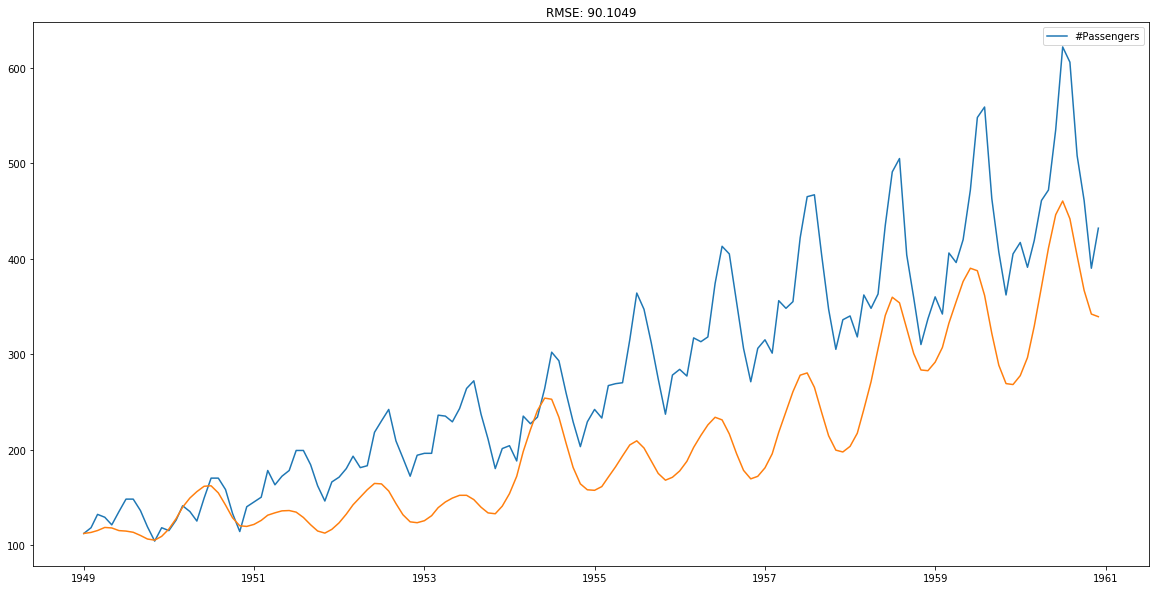

In [149]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(ts)
plt.legend(loc='best')
plt.plot(predictions_ARIMA)
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))